In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_, distinct
from dateutil.relativedelta import relativedelta

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d4f5b54fd0>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US'}

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d4f5b98668>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
for row in session.query(Measurement.date,Measurement.prcp).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2013-12-13', 0.02)
('2013-12-14', 0.0)
('2013-12-15', 0.0)
('2013-12-16', 1.1)
('2013-12-17', 0.02)
('2013-12-18', 0.0)
('2013-12-19', 0.16)
('2013-12-20', 0.09)
('2013-12-21', 0.02)
('2013-12-22', 0.0)
('2013-12-23', 0.0)
('2013-12-24', 0.05)
('2013-12-25', 0.02)
('2013-12-26', 0.0)
('2013-12-27', 0.0)
('2013-12-28', 0.0)
('2013-12-29', 0.0)
('2013-12-30', 0.0)
('2013-12-31', 0.0)
('2014-01-01', 0.0)
('2014-01-02', 0.0)
('2014-01-03', 0.76)
('2014-01-04', 0.0)
('2014-01-05', 0.0)
('2014-01-06', 0.0)
('2014-01-07', 0.0)
('2014-01-08', 0.0)
('2014-01-09', 0.03)
('2014-01-10', None)
('2014-01-11', None)
('2014-01-12', 0.35)
('2014-01-13', 0.0)
('2014-01-14', 0.43)
('2014-01-15', 0.01)
('2014-01-16', 0.25)
('2014-01-17', 0.0)
('2014-01-18', 0.0)
('2014-01-19', 0.0)
('2014-01-20', 0.0)
('2014-01-21', 0.0)
('2014-01-22', 0.35)
('2014-01-23', 0.0)
('2014-01-24', 0.0)
('2014-01-25', 0.0)
('2014-01-26', 0.0)
('2014-01-27', 0.14)
('2014-01-28', 0.02)
('2014-01-29', 0.27)
('2014-01-30', 0.04)


('2010-10-26', 0.16)
('2010-10-27', 0.06)
('2010-10-28', 0.09)
('2010-10-29', 0.1)
('2010-10-30', 0.11)
('2010-10-31', 0.0)
('2010-11-01', 0.42)
('2010-11-02', 0.1)
('2010-11-03', 0.0)
('2010-11-04', 0.39)
('2010-11-05', 0.07)
('2010-11-06', 0.1)
('2010-11-07', 0.21)
('2010-11-08', 0.0)
('2010-11-09', 0.01)
('2010-11-10', 0.0)
('2010-11-11', 0.0)
('2010-11-12', 0.0)
('2010-11-13', 0.03)
('2010-11-14', 0.02)
('2010-11-15', 0.35)
('2010-11-16', 0.01)
('2010-11-17', 0.0)
('2010-11-18', 0.0)
('2010-11-19', 0.19)
('2010-11-20', 0.02)
('2010-11-21', 0.0)
('2010-11-22', 0.02)
('2010-11-23', 0.0)
('2010-11-24', 0.0)
('2010-11-25', 0.16)
('2010-11-26', 0.0)
('2010-11-27', 0.03)
('2010-11-28', 0.49)
('2010-11-29', 0.04)
('2010-11-30', 0.15)
('2010-12-01', 0.76)
('2010-12-02', 0.13)
('2010-12-03', 0.16)
('2010-12-04', 0.0)
('2010-12-05', 0.0)
('2010-12-06', 0.0)
('2010-12-07', 0.0)
('2010-12-08', 0.0)
('2010-12-09', 0.0)
('2010-12-10', 1.95)
('2010-12-11', 0.62)
('2010-12-12', 0.15)
('2010-12-13'

('2014-12-11', 0.05)
('2014-12-12', 0.12)
('2014-12-13', 0.03)
('2014-12-14', 0.11)
('2014-12-15', 0.0)
('2014-12-16', 0.03)
('2014-12-17', 0.14)
('2014-12-18', 0.09)
('2014-12-19', 0.01)
('2014-12-20', 0.0)
('2014-12-21', 0.0)
('2014-12-22', 0.0)
('2014-12-23', 1.1)
('2014-12-24', 1.24)
('2014-12-25', 0.09)
('2014-12-26', 0.0)
('2014-12-27', 0.0)
('2014-12-28', 0.0)
('2014-12-29', 0.0)
('2014-12-30', 0.0)
('2014-12-31', 0.72)
('2015-01-01', 0.01)
('2015-01-02', 0.01)
('2015-01-03', 1.46)
('2015-01-04', 0.02)
('2015-01-05', 0.0)
('2015-01-06', 0.07)
('2015-01-07', 0.0)
('2015-01-08', 0.0)
('2015-01-09', 0.0)
('2015-01-10', 0.04)
('2015-01-11', 0.0)
('2015-01-12', 0.0)
('2015-01-13', 0.0)
('2015-01-14', 0.0)
('2015-01-15', 0.0)
('2015-01-16', 0.01)
('2015-01-17', 0.0)
('2015-01-18', 0.0)
('2015-01-19', 0.0)
('2015-01-20', 0.0)
('2015-01-21', 0.0)
('2015-01-22', 0.0)
('2015-01-23', 0.0)
('2015-01-24', 0.09)
('2015-01-25', 0.46)
('2015-01-26', 0.73)
('2015-01-27', 0.01)
('2015-01-28', 0.0

('2010-12-01', 0.03)
('2010-12-02', 0.06)
('2010-12-03', 0.22)
('2010-12-04', 0.0)
('2010-12-05', 0.0)
('2010-12-06', 0.0)
('2010-12-07', 0.0)
('2010-12-08', 0.0)
('2010-12-09', 0.12)
('2010-12-10', 2.01)
('2010-12-11', 0.26)
('2010-12-12', 0.01)
('2010-12-13', 0.65)
('2010-12-14', 0.0)
('2010-12-15', 0.0)
('2010-12-16', 0.0)
('2010-12-17', 0.0)
('2010-12-18', 0.0)
('2010-12-19', 2.43)
('2010-12-20', 2.55)
('2010-12-21', 0.49)
('2010-12-22', 0.05)
('2010-12-23', 0.02)
('2010-12-24', 0.0)
('2010-12-26', None)
('2010-12-27', 0.15)
('2010-12-28', 0.96)
('2010-12-29', 0.01)
('2010-12-30', 0.05)
('2010-12-31', 0.0)
('2011-01-01', 0.14)
('2011-01-02', 0.0)
('2011-01-03', 0.04)
('2011-01-04', 0.0)
('2011-01-05', 0.0)
('2011-01-06', 0.13)
('2011-01-07', 0.0)
('2011-01-08', 0.0)
('2011-01-09', 0.08)
('2011-01-10', 0.0)
('2011-01-11', 0.61)
('2011-01-12', 0.54)
('2011-01-13', 3.91)
('2011-01-14', 0.17)
('2011-01-16', 0.0)
('2011-01-17', 0.07)
('2011-01-18', 0.0)
('2011-01-19', 0.07)
('2011-01-20

('2016-04-12', 0.0)
('2016-04-13', 0.03)
('2016-04-14', 0.02)
('2016-04-15', 0.03)
('2016-04-17', None)
('2016-04-18', 0.46)
('2016-04-19', 0.0)
('2016-04-20', 0.03)
('2016-04-21', 0.02)
('2016-04-22', 0.0)
('2016-04-23', 0.1)
('2016-04-24', 0.01)
('2016-04-25', 0.0)
('2016-04-26', 0.01)
('2016-04-27', 0.1)
('2016-04-28', 0.0)
('2016-04-29', 0.0)
('2016-04-30', 0.08)
('2016-05-01', 0.01)
('2016-05-02', 0.11)
('2016-05-03', 0.03)
('2016-05-04', 0.36)
('2016-05-05', 0.41)
('2016-05-09', None)
('2016-05-10', 0.15)
('2016-05-11', 0.0)
('2016-05-12', 0.0)
('2016-05-13', 0.0)
('2016-05-15', None)
('2016-05-16', 0.0)
('2016-05-17', 0.0)
('2016-05-18', 0.36)
('2016-05-19', 0.0)
('2016-05-20', 0.04)
('2016-05-21', 0.04)
('2016-05-22', 0.04)
('2016-05-23', 0.11)
('2016-05-24', 0.0)
('2016-05-25', 0.05)
('2016-05-26', 0.35)
('2016-05-27', 0.09)
('2016-05-28', 0.04)
('2016-05-29', 0.0)
('2016-05-30', 0.0)
('2016-05-31', 0.42)
('2016-06-01', 0.22)
('2016-06-02', 0.35)
('2016-06-03', 0.02)
('2016-06

('2017-06-06', None)
('2017-06-07', None)
('2017-06-08', None)
('2017-06-09', None)
('2017-06-13', None)
('2017-06-14', None)
('2017-06-15', None)
('2017-06-16', None)
('2017-06-19', None)
('2017-06-20', None)
('2017-06-21', None)
('2017-06-22', 0.0)
('2017-06-23', 0.0)
('2017-06-26', None)
('2017-06-27', 0.0)
('2017-06-28', 0.0)
('2017-06-29', 0.0)
('2017-06-30', 0.12)
('2017-07-03', None)
('2017-07-05', None)
('2017-07-06', None)
('2017-07-07', None)
('2017-07-10', None)
('2017-07-11', None)
('2017-07-12', None)
('2017-07-13', None)
('2017-07-18', 0.0)
('2017-07-19', 0.0)
('2017-07-20', 0.0)
('2017-07-21', 0.0)
('2017-07-25', 0.0)
('2017-07-26', None)
('2017-07-27', None)
('2017-07-28', 0.01)
('2017-07-31', None)
('2010-01-01', 0.21)
('2010-01-02', 0.02)
('2010-01-03', 0.0)
('2010-01-04', 0.01)
('2010-01-05', 0.02)
('2010-01-07', None)
('2010-01-08', 0.03)
('2010-01-09', 0.01)
('2010-01-10', 0.01)
('2010-01-11', 0.14)
('2010-01-12', 0.02)
('2010-01-13', 0.02)
('2010-01-14', 0.0)
('20

('2013-03-04', 0.0)
('2013-03-05', 0.0)
('2013-03-06', 0.0)
('2013-03-07', 0.04)
('2013-03-08', 0.0)
('2013-03-09', 0.13)
('2013-03-10', 1.11)
('2013-03-11', 1.02)
('2013-03-12', 0.02)
('2013-03-13', 0.06)
('2013-03-14', 0.13)
('2013-03-15', 0.0)
('2013-03-16', 0.0)
('2013-03-17', 0.0)
('2013-03-18', 0.09)
('2013-03-19', 0.0)
('2013-03-20', 0.0)
('2013-03-21', 0.0)
('2013-03-22', 0.0)
('2013-03-23', 0.59)
('2013-03-25', None)
('2013-03-26', 0.0)
('2013-03-27', 0.12)
('2013-03-28', 0.03)
('2013-03-29', 0.15)
('2013-03-30', 0.03)
('2013-03-31', 0.02)
('2013-04-01', 0.0)
('2013-04-02', 0.01)
('2013-04-03', 0.0)
('2013-04-04', 0.02)
('2013-04-05', 0.0)
('2013-04-06', 0.0)
('2013-04-07', 0.0)
('2013-04-08', 0.0)
('2013-04-09', 0.0)
('2013-04-10', 0.0)
('2013-04-11', 0.0)
('2013-04-12', 0.0)
('2013-04-13', 0.0)
('2013-04-14', 0.0)
('2013-04-15', 0.44)
('2013-04-16', 0.01)
('2013-04-17', 0.0)
('2013-04-18', 0.0)
('2013-04-19', 0.01)
('2013-04-20', 0.0)
('2013-04-21', 0.0)
('2013-04-22', 0.35)

('2011-09-12', 0.0)
('2011-09-13', 0.01)
('2011-09-14', 0.11)
('2011-09-15', 0.09)
('2011-09-16', 1.25)
('2011-09-17', 0.09)
('2011-09-18', 0.42)
('2011-09-19', 0.14)
('2011-09-20', 0.03)
('2011-09-21', 0.02)
('2011-09-22', 0.16)
('2011-09-23', 0.0)
('2011-09-24', 0.02)
('2011-09-25', 0.0)
('2011-09-26', 0.0)
('2011-09-27', 0.0)
('2011-09-28', 0.1)
('2011-09-29', 0.03)
('2011-09-30', 0.08)
('2011-10-01', 0.01)
('2011-10-02', 0.0)
('2011-10-03', 0.0)
('2011-10-04', 0.05)
('2011-10-05', 0.14)
('2011-10-06', 0.02)
('2011-10-07', 0.15)
('2011-10-08', 0.13)
('2011-10-09', 0.07)
('2011-10-10', 0.0)
('2011-10-11', 0.08)
('2011-10-12', 0.01)
('2011-10-13', 0.06)
('2011-10-14', 0.01)
('2011-10-15', 0.22)
('2011-10-16', 0.06)
('2011-10-17', 0.0)
('2011-10-18', 0.01)
('2011-10-19', 0.38)
('2011-10-20', 0.13)
('2011-10-21', 0.0)
('2011-10-22', 0.34)
('2011-10-23', 1.48)
('2011-10-24', 2.4)
('2011-10-25', 0.03)
('2011-10-26', 0.0)
('2011-10-27', 0.0)
('2011-10-28', 0.3)
('2011-10-29', 0.09)
('2011-

('2015-12-01', 0.02)
('2015-12-02', 0.02)
('2015-12-03', 0.22)
('2015-12-04', 0.03)
('2015-12-05', 0.0)
('2015-12-06', 0.1)
('2015-12-07', 0.02)
('2015-12-08', 0.02)
('2015-12-09', 0.08)
('2015-12-10', 0.1)
('2015-12-11', 0.15)
('2015-12-12', 0.31)
('2015-12-13', 0.03)
('2015-12-14', 0.13)
('2015-12-15', 0.35)
('2015-12-16', 0.03)
('2015-12-17', 0.09)
('2015-12-18', 0.17)
('2015-12-19', 0.13)
('2015-12-20', 0.05)
('2015-12-21', 0.15)
('2015-12-22', 0.04)
('2015-12-23', 0.1)
('2015-12-24', 0.45)
('2015-12-25', 0.47)
('2015-12-26', 0.22)
('2015-12-27', 0.8)
('2015-12-28', 0.0)
('2015-12-29', 0.16)
('2015-12-30', 0.5)
('2015-12-31', 0.09)
('2016-01-01', 0.02)
('2016-01-02', 0.03)
('2016-01-03', 0.0)
('2016-01-04', 0.0)
('2016-01-05', 0.18)
('2016-01-06', 0.35)
('2016-01-07', 0.35)
('2016-01-08', 0.02)
('2016-01-09', 0.02)
('2016-01-10', 0.02)
('2016-01-11', 0.0)
('2016-01-12', 0.02)
('2016-01-13', 0.0)
('2016-01-14', 0.0)
('2016-01-15', 0.02)
('2016-01-16', 0.05)
('2016-01-17', 0.0)
('201

('2012-12-06', 0.01)
('2012-12-07', 0.0)
('2012-12-08', 0.0)
('2012-12-09', 0.0)
('2012-12-10', 0.0)
('2012-12-11', 0.0)
('2012-12-12', 0.0)
('2012-12-13', 0.0)
('2012-12-14', 0.15)
('2012-12-15', 0.0)
('2012-12-16', 0.0)
('2012-12-17', 0.0)
('2012-12-18', 0.02)
('2012-12-19', 0.0)
('2012-12-20', 0.0)
('2012-12-21', 0.0)
('2012-12-22', 0.01)
('2012-12-23', 0.0)
('2012-12-24', 0.0)
('2012-12-25', 0.0)
('2012-12-26', 0.0)
('2012-12-27', 0.0)
('2012-12-28', 0.0)
('2012-12-29', 0.0)
('2012-12-30', 0.0)
('2012-12-31', 0.0)
('2013-01-01', 0.0)
('2013-01-02', 0.01)
('2013-01-03', 0.13)
('2013-01-04', 0.01)
('2013-01-05', 0.0)
('2013-01-06', 0.0)
('2013-01-07', 0.01)
('2013-01-08', 0.0)
('2013-01-09', 0.01)
('2013-01-10', 0.0)
('2013-01-11', 0.0)
('2013-01-12', 0.0)
('2013-01-13', 0.0)
('2013-01-14', 0.01)
('2013-01-15', 0.53)
('2013-01-16', 0.0)
('2013-01-17', 0.0)
('2013-01-18', 0.0)
('2013-01-19', 0.0)
('2013-01-20', 0.0)
('2013-01-22', 0.0)
('2013-01-23', 0.0)
('2013-01-24', 0.03)
('2013-0

('2012-11-12', 0.28)
('2012-11-13', 0.42)
('2012-11-14', 0.2)
('2012-11-15', 0.64)
('2012-11-16', 0.74)
('2012-11-17', 0.18)
('2012-11-19', None)
('2012-11-20', 0.36)
('2012-11-21', 0.11)
('2012-11-22', 0.0)
('2012-11-23', 0.0)
('2012-11-24', 0.0)
('2012-11-25', 0.0)
('2012-11-26', 0.53)
('2012-11-27', 0.01)
('2012-11-28', 0.01)
('2012-11-29', 0.0)
('2012-11-30', 0.0)
('2012-12-01', 0.0)
('2012-12-02', 0.01)
('2012-12-03', 0.0)
('2012-12-04', 0.0)
('2012-12-05', 0.04)
('2012-12-06', 0.0)
('2012-12-07', 0.0)
('2012-12-08', 0.01)
('2012-12-09', 0.04)
('2012-12-10', 0.12)
('2012-12-11', 0.0)
('2012-12-12', 0.24)
('2012-12-13', 0.44)
('2012-12-14', 0.72)
('2012-12-15', 0.44)
('2012-12-16', 0.48)
('2012-12-17', 0.54)
('2012-12-18', 2.25)
('2012-12-19', 0.34)
('2012-12-20', 1.8)
('2012-12-21', 0.67)
('2012-12-22', 0.12)
('2012-12-23', 0.0)
('2012-12-24', 0.0)
('2012-12-25', 0.0)
('2012-12-26', 0.21)
('2012-12-27', 0.02)
('2012-12-28', 0.0)
('2012-12-29', 0.0)
('2012-12-30', 0.1)
('2012-12-31

('2017-03-28', 0.68)
('2017-03-29', 0.07)
('2017-03-31', None)
('2017-04-01', 0.2)
('2017-04-02', 0.0)
('2017-04-03', 0.23)
('2017-04-04', 0.02)
('2017-04-05', 0.45)
('2017-04-06', 0.0)
('2017-04-08', None)
('2017-04-09', 0.0)
('2017-04-10', 0.0)
('2017-04-11', 0.25)
('2017-04-12', 0.65)
('2017-04-13', 0.23)
('2017-04-14', 2.82)
('2017-04-15', 0.9)
('2017-04-16', 0.11)
('2017-04-17', 1.3)
('2017-04-18', 0.98)
('2017-04-19', 0.14)
('2017-04-20', 0.0)
('2017-04-21', 1.84)
('2017-04-22', 1.35)
('2017-04-23', 0.35)
('2017-04-24', 0.05)
('2017-04-25', 0.0)
('2017-04-26', 0.22)
('2017-04-27', 0.11)
('2017-04-28', 0.79)
('2017-04-29', 0.0)
('2017-04-30', 0.8)
('2017-05-01', 0.25)
('2017-05-02', 0.0)
('2017-05-04', None)
('2017-05-05', 0.1)
('2017-05-06', 0.0)
('2017-05-07', 0.03)
('2017-05-08', 1.11)
('2017-05-09', 0.23)
('2017-05-10', 0.55)
('2017-05-11', 0.44)
('2017-05-12', 0.1)
('2017-05-13', 0.1)
('2017-05-14', 1.0)
('2017-05-15', 0.6)
('2017-05-16', 0.3)
('2017-05-17', 0.06)
('2017-05-1

In [11]:
# Calculate the last datapoint in the db: 
end_date = session.query(func.max(Measurement.date))
end_date.all()

[('2017-08-23')]

In [12]:
# Perform a query to retrieve the data and precipitation scores for a 1yr lookback from end date
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date >= '2016-08-23',Measurement.date <=end_date)).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.set_index('date')

# Sort the dataframe by date
prcp_df = prcp_df.sort_index()
prcp_df.dropna()
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [14]:
# Mr. Clean 
clean_df = prcp_df.dropna()
clean_df

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0.5, 1.0, 'Precipitation Trend Overtime')

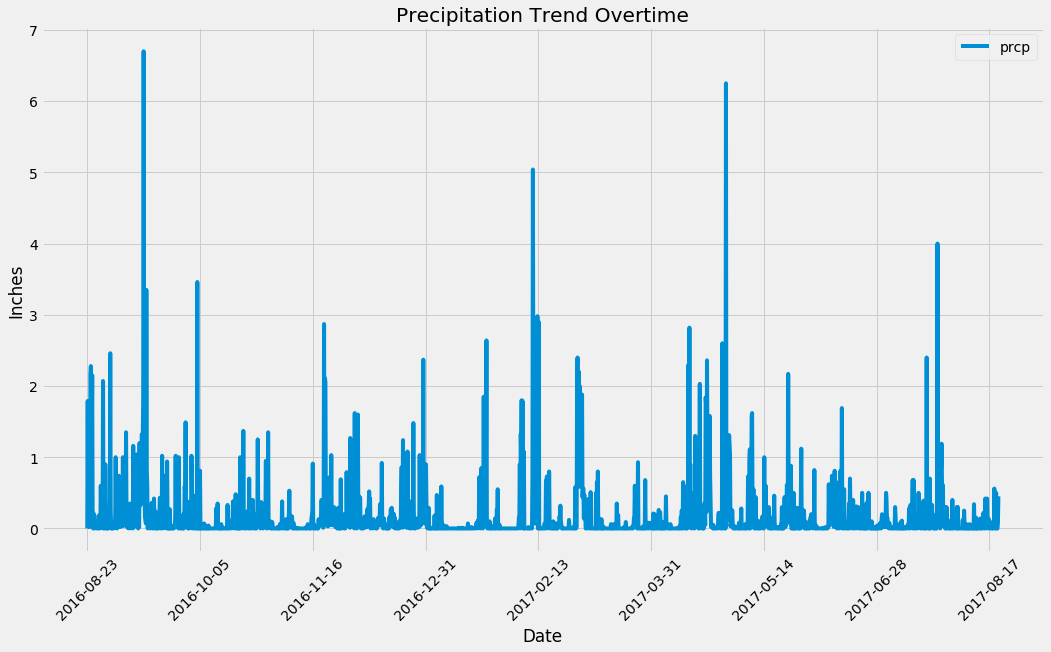

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
clean_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Trend Overtime')

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
# Design a query to show how many stations are available in this dataset?
# I wasn't sure if dataset meant the data in the DB or the dataset for 
# the date range we were looking at so I went by the first option.
sn = session.query(func.count(distinct(Station.station)))
sn.all()

[(9)]

In [38]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# only pulling in prcp
active_stations = session.query(Measurement.station,(func.count(Measurement.tobs))).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
h_mas_date = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(h_mas_date)

l_mas_date = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(l_mas_date)

avg_mas_date = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(avg_mas_date)

[(85.0,)]
[(54.0,)]
[(71.66378066378067,)]


In [54]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mas_t_data = session.query(Measurement.tobs).filter(and_(Measurement.station=='USC00519281',Measurement.date >= '2016-08-23',Measurement.date <=end_date)).all()
one_station_temps = pd.DataFrame(mas_t_data,columns =['Temp'])
one_station_temps

,Temp
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 1.0, 'Temp Frequencies for Station: USC00519281')

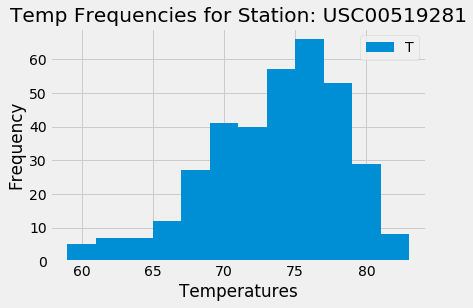

In [63]:
plt.hist(one_station_temps['Temp'],bins=12)
plt.xlabel('Temperatures')
plt.ylabel('Frequency')
plt.legend('Temp')
plt.title('Temp Frequencies for Station: USC00519281')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
